In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print (tf.__version__)
print (sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print (module.__name__, module.__version__)

2.0.0-beta1
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-beta1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [12]:
layer  = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None,5))
layer(tf.zeros([10,5]))

<tf.Tensor: id=67, shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 

In [13]:
#layer.variables
# 全连接层  x* w+b
layer.trainable_variables

[<tf.Variable 'dense_6/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 7.24631548e-03, -1.72437966e-01,  1.15284175e-02,
         -1.35799259e-01, -4.62370664e-02, -2.06341296e-01,
          1.19350508e-01, -2.44831443e-02,  1.67552188e-01,
          9.24361199e-02, -1.39298216e-01,  1.84263989e-01,
         -1.00804895e-01, -1.15902729e-01, -2.06172422e-01,
          2.06109688e-01, -2.26140812e-01,  2.02513024e-01,
          8.11235160e-02, -1.99187770e-01,  4.53620404e-02,
          1.81701317e-01, -9.87691730e-02,  3.28040123e-03,
         -1.44454598e-01,  1.78590134e-01, -2.02059895e-02,
          7.43671209e-02,  1.38073727e-01, -9.69542265e-02,
          1.89232692e-01,  2.24689767e-01,  1.27171725e-02,
         -2.03212321e-01,  2.36850873e-01, -1.80567548e-01,
         -4.74550575e-02, -2.08485931e-01, -1.60428748e-01,
          4.55833524e-02, -1.86926588e-01, -8.48273784e-02,
          1.55649081e-01, -1.90925047e-01, -2.07780927e-01,
          1.43876299e-01, -2.3

In [14]:
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size

In [15]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print (housing.DESCR)
print (housing.data.shape)
print (housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [16]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7, test_size=0.25)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11, test_size = 0.25)

print (x_train.shape, y_train.shape)
print (x_valid.shape, y_valid.shape)
print (x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #这里使用fit_transform函数，因为在训练集上获得均值和方差，在验证集和测试集上面使用
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [33]:
#tf.nn.softplus

customizedsoftplus = keras.layers.Lambda(lambda x:tf.nn.softplus(x))

print (customizedsoftplus([-10.,-5.,5.,6.,7.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 5.0067153e+00 6.0024757e+00 7.0009117e+00], shape=(5,), dtype=float32)


In [26]:
# customized dense layer.

class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(name ='kernel',
                                     shape = (input_shape[1],self.units),
                                     initializer = 'uniform',
                                     trainable = True)
        self.bias = self.add_weight(name='bias',
                                   shape = (self.units,),
                                   initializer = 'zeros',
                                   trainable = True)
        super(CustomizedDenseLayer, self).build(input_shape)
    def call(self, x):
        '''完成正向计算'''
        return self.activation(x @ self.kernel + self.bias)
    
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation= 'relu',
                      input_shape =x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customizedsoftplus
])
model.summary()
model.compile(loss="mean_squared_error", optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train_scaled,y_train,
                   validation_data=(x_valid_scaled,y_valid),
                   epochs=100,
                   callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 57us/sample - loss: 1.1002 - val_loss: 0.6377
Epoch 2/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5534 - val_loss: 0.5480
Epoch 3/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4871 - val_loss: 0.4892
Epoch 4/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4666 - val_loss: 0.4843
Epoch 5/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4494 - val_loss: 0.4796
Epoch 6/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4318 - val_loss: 0.4486
Epoch 7/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4250 - val_loss: 0.4392
Epoch 8/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4244 - val_loss: 0.4337
Epoch 9/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.409

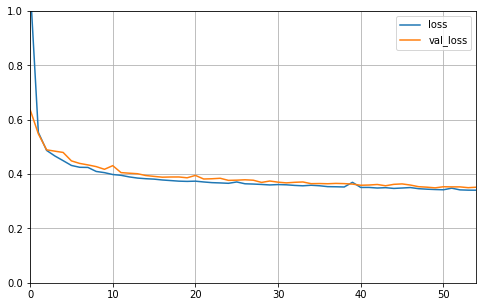

In [28]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)

    plt.show()
    
plot_learning_curves(history)

In [23]:
keras.layers.Layer??

Init signature:
keras.layers.Layer(
    trainable=True,
    name=None,
    dtype=None,
    dynamic=False,
    **kwargs,
)
Source:        
class Layer(module.Module):
  """Base layer class.

  This is the class from which all layers inherit.

  A layer is a class implementing common neural networks operations, such
  as convolution, batch norm, etc. These operations require managing weights,
  losses, updates, and inter-layer connectivity.

  Users will just instantiate a layer and then treat it as a callable.

  We recommend that descendants of `Layer` implement the following methods:

  * `__init__()`: Save configuration in member variables
  * `build()`: Called once from `__call__`, when we know the shapes of inputs
    and `dtype`. Should have the calls to `add_weight()`, and then
    call the super's `build()` (which sets `self.built = True`, which is
    nice in case the user wants to call `build()` manually before the
    first `__call__`).
  * `call()`: Called in `__call__` afte